In [287]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import itertools
import nltk
nltk.download('punkt')
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [288]:
#Importing dataset
data = pd.read_csv(r'/content/drive/My Drive/costello_ace_2017-2018.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10,11,12,20,23,24,25,29,30,31,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
data = data[data["Net Sales"] != "Net Sales"]

In [0]:
# Checking for null values.
info = pd.DataFrame(data=data.isnull().sum()).T.rename(index={0:'Null values'})
info = info.append(pd.DataFrame(data=data.isnull().sum()/data.shape[0] * 100).T.rename(index={0:'% Null values'}))
info

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
Null values,0.0,1.000000,63.000000,1.000000,1.000000,1.000000,121426.000000,1.000000,1.000000,1.000000,...,1.000000,5.206254e+06,6.512743e+06,5.122930e+06,937.000000,1.000000,1.000000,1.000000,17977.000000,1.674858e+07
% Null values,0.0,0.000006,0.000364,0.000006,0.000006,0.000006,0.700748,0.000006,0.000006,0.000006,...,0.000006,3.004525e+01,3.758499e+01,2.956439e+01,0.005407,0.000006,0.000006,0.000006,0.103745,9.665593e+01


In [0]:
# Removing null values
data.dropna(axis=0, subset = ['Customer Number'], inplace=True)
info = pd.DataFrame(data=data.isnull().sum()).T.rename(index={0:'Null values'})
info = info.append(pd.DataFrame(data=data.isnull().sum()/data.shape[0] * 100).T.rename(index={0:'% Null values'}))
info

In [0]:
t = data.columns
for cols in t:
    data[cols]=data[cols].fillna(data[cols].mode().iloc[0])

In [0]:
pd.DataFrame({'products':len(data['Item Number'].value_counts()),
              'transanctions':len(data['Receipt Number'].value_counts()),
              'Customers':len(data['Customer Number'].value_counts())},
             index = ['Net Sales Units'])

,products,transanctions,Customers
Net Sales Units,112369,1324880,349345


In [0]:
There are 1324880 transanctions but only 349345 customers with 112369 products. It seems that some orders were placed then returned or the customers bought items multiple times or multiple items were bought in a single transanction.

In [0]:
data = data[pd.notnull(data['Date'])]
data['Date'] =  pd.to_datetime(data['Date'], errors='coerce')

In [0]:
df = data.groupby(['Customer Number', 'Receipt Number', 'Item Type'], as_index=False)['Date'].count()
df = df.rename(columns = {'Date':'Number of products'})
df[:10].sort_values('Customer Number')

,Customer Number,Receipt Number,Item Type,Number of products
0,*0,A02258,Sale,2
1,*0,A15601,Sale,4
2,*0,A18344,Sale,1
3,*0,A32613,Sale,1
4,*0,A32665,Sale,2
5,*0,A34295,Defective,1
6,*0,A36415,Sale,5
7,*0,A48740,Sale,4
8,*0,A66553,Sale,2
9,*0,A66639,Sale,5


In [0]:
There are customers who purchase only 1 item per transanction and others who purchase many items per transanction.

In [0]:
df['Return Orders'] = df['Item Type'].apply(lambda x: int('Return' in str(x)))
df.tail()

,Customer Number,Receipt Number,Item Type,Number of products,Return Orders
6503387,99999,58270,Sale,1,0
6503388,99999,58477,Sale,2,0
6503389,99999,58479,Sale,1,0
6503390,99999,61859,Sale,1,0
6503391,99999,6514,Sale,1,0


In [0]:
# Printing number of orders returned ->
print("Number of orders returned {}/{} ({:.2f}%)".format(df['Return Orders'].sum(), df.shape[0], df['Return Orders'].sum()/ df.shape[0] * 100))

Number of orders returned 920580/6503392 (14.16%)


In [0]:
data.sort_values('Customer Number')[:5]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
16240729,2017-09-10,11:47:53,*0,A32665,E,14664 NORTH MASSAPEQUA,29069753566,9106618,LANYARD ASSORTMENT,1.0,...,0.0,11738.0,2544.0,1924577066.0,ANDREW SAULPAUGH,Sale,2,Sale,Retail,W
9337855,2017-06-28,10:21:38,*0,E66524,L,15348 ROCKY POINT,OTHER,7438336,MG GARDN SOIL FLWR1.5CF,1.0,...,0.0,11738,2544,1924577066.0,GARY SUZIK,Sale,2,Sale,Retail,W
9221300,2017-06-24,8:54:07,*0,E65006,L,15348 ROCKY POINT,20066187651,1395946,SPRYPNT 2X GLS HUNTR GRN,1.0,...,1.49,11738.0,2544.0,1924577066.0,GARY SUZIK,Sale,3,Sale,Promotion,W
11331978,2018-03-29,13:44:59,*0,A80025,Y,16663 EDGEWATER,OTHER,45533,"PIPE POLY 1""X100' UTL100",2.0,...,0,11738,2544,1924577066.0,DEBORAH GAMIZ,Sale,6,Sale,Retail,W
11331977,2018-03-29,13:44:59,*0,A80025,Y,16663 EDGEWATER,6.11942E+11,47543,"BUSHING 40PVC 1.5M1"" FPT",1.0,...,0,11738,2544,1924577066.0,DEBORAH GAMIZ,Sale,5,Sale,Retail,W


In [6]:
df = data[data['Promo/Discount'].isin (['D','P','Q','S'])]
df.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
1,2017-04-01,7:02:55,290074,D70801,O,15863 COPIAGUE,OTHER,7158314,ACE FERT 4STEP 5M,1,64.99,43.5,21.49,33.07%,70,"LAWN, GARDEN & FARM SUPPLIES",744,FERTILIZERS,74401,LAWN (DRY BAG),5,1042017,S,1871,64.99,67.99,($3.00),Y,Bankcard Tender,3,11717,8017,1.92617e+09,LISA JUDGE,Sale,1,Sale,Promotion,NaN
2,2017-04-01,7:02:55,290074,D70801,O,15863 COPIAGUE,OTHER,IS117235,7158314 $20 INST SAVINGS,-1,-20,0,-20,100.00%,I1,ACE REWARDS INSTANT SAVINGS,IS1,ACE COUPON/CREDIT ITEMS,IS106,ACE COUPON/CREDIT ITEMS,5,170451AC,S,1871,20,20,$0.00,N,Bankcard Tender,0,11717,8017,1.92617e+09,LISA JUDGE,Return,2,Return,Promotion,NaN
30,2017-04-01,7:49:01,11391,18465,3,3164 NESCONSET,45923098024,S9802,15A21/LED/2700K/120V/4PK,2,39.98,25.74,14.24,35.62%,30,"FLASHLIGHTS, LIGHTING & SUPPLIES",366,LED LIGHT BULBS,36601,DECORATIVE - LED,1,1041317,S,0,19.99,24.99,($5.00),Y,Charge Tender,5,11749,NaN,1.98174e+09,JUAN DIAZ,Sale,1,Sale,Promotion,NaN
38,2017-04-01,7:56:56,301516,E37839,L,15348 ROCKY POINT,71549043056,71383,GROUND CLEAR CONC GAL,1,17.59,13.94,3.65,20.75%,70,"LAWN, GARDEN & FARM SUPPLIES",753,WEED CONTROL PRODUCTS,75304,VEGETATION KILL,1,4170401S,S,1591,17.59,23.99,($6.40),Y,Bankcard Tender,6.4,11778,9699,1.92292e+09,REBECCA EDWARDS,Sale,1,Sale,Category Price Plan,NaN
39,2017-04-01,7:56:56,301516,E37839,L,15348 ROCKY POINT,71549019686,7306574,HOME DEFENSE RTU 1.1GAL,1,12.29,10.41,1.88,15.30%,70,"LAWN, GARDEN & FARM SUPPLIES",750,INSECTICIDES/REPELLENTS,75007,RTU PRODUCTS/APPLICATORS,1,4170401Q,S,1589,12.29,16.99,($4.70),Y,Bankcard Tender,4.7,11778,9699,1.92292e+09,REBECCA EDWARDS,Sale,3,Sale,Category Price Plan,NaN


In [0]:
data['Net Sales Units'] = data['Net Sales Units'].astype(str).str.replace(",", "").astype(float)
data['Net Sales'] = data['Net Sales'].astype(str).str.replace(",", "").astype(float)

In [8]:

df = data[(data['Net Sales Units']<0) & (~data['Promo/Discount'].isin (['D','P','Q','S']))][['Customer Number','Net Sales Units','Item Description','Cost']]
df.head()

,Customer Number,Net Sales Units,Item Description,Cost
22,104609,-1.0,$5 REWARDC,0
127,*AC2H9,-1.0,IN-STORE COUPON SAVE $5.00,-0.01
224,*80179,-1.0,HEATER QUARTZ TOWER-WHITE,-28.24
230,*66493,-1.0,WBG MAX CRABGRASSRTU1GL,-8.18
231,*66493,-1.0,INSECT KILLR INDOOR 1GAL,-7.36


In [9]:
for index, col in df.iterrows():
    if data[(data['Customer Number'] == col[0]) & (data['Net Sales Units'] == -col[1]) & (data['Item Description'] == col[2])].shape[0] == 0:
        print(index, df.loc[index])
        print("There are some transanctions for which counterpart does not exist")
        break

22 Customer Number         104609
Net Sales Units             -1
Item Description    $5 REWARDC
Cost                         0
Name: 22, dtype: object
There are some transanctions for which counterpart does not exist


In [0]:
data['Cost'] = data['Cost'].astype(str).str.replace(",", "").astype(float)

In [10]:
data['TotalPrice'] = data['Cost'].astype(float) * data['Net Sales Units']
data.sort_values('Customer Number')[:5]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code,TotalPrice
16240729,2017-09-10,11:47:53,*0,A32665,E,14664 NORTH MASSAPEQUA,29069753566,9106618,LANYARD ASSORTMENT,1.0,2.49,0.57,1.92,77.11%,50,HARDWARE,511,KEY RINGS/ACCESSORIES,51102,BUCKET PROGRAM,1,NaN,NaN,0,2.49,2.49,$0.00,Y,Bankcard Tender,0,11738,2544,1.92458e+09,ANDREW SAULPAUGH,Sale,2,Sale,Retail,NaN,0.57
9337855,2017-06-28,10:21:38,*0,E66524,L,15348 ROCKY POINT,OTHER,7438336,MG GARDN SOIL FLWR1.5CF,1.0,5.84,6.38,-0.54,-9.25%,70,"LAWN, GARDEN & FARM SUPPLIES",746,BAG PRODUCTS,74604,POTTING/TOP-SOILS-LARGEPK,5,NaN,NaN,0,7.99,7.99,$0.00,Y,Bankcard Tender,0,11738,2544,1.92458e+09,GARY SUZIK,Sale,2,Sale,Retail,NaN,6.38
9221300,2017-06-24,8:54:07,*0,E65006,L,15348 ROCKY POINT,20066187651,1395946,SPRYPNT 2X GLS HUNTR GRN,1.0,3.50,2.51,0.99,28.29%,14,PAINT & PAINT SUPPLIES,163,SPRAY PAINTS,16301,GENERAL PURPOSE,1,1062217,S,0,3.5,4.99,($1.49),Y,Bankcard Tender,1.49,11738,2544,1.92458e+09,GARY SUZIK,Sale,3,Sale,Promotion,NaN,2.51
11331978,2018-03-29,13:44:59,*0,A80025,Y,16663 EDGEWATER,OTHER,45533,"PIPE POLY 1""X100' UTL100",2.0,0.78,0.30,0.48,61.54%,40,PLUMBING SUPPLIES & FIXTURES,478,PLASTIC PIPE,47806,POLYETHYLENE UTILITY PIPE,5,NaN,NaN,0,0.39,0.39,$0.00,Y,Bankcard Tender,0,11738,2544,1.92458e+09,DEBORAH GAMIZ,Sale,6,Sale,Retail,NaN,0.60
11331977,2018-03-29,13:44:59,*0,A80025,Y,16663 EDGEWATER,6.11942E+11,47543,"BUSHING 40PVC 1.5M1"" FPT",1.0,2.99,1.07,1.92,64.21%,40,PLUMBING SUPPLIES & FIXTURES,477,PLASTIC FITTINGS,47701,PVC PRESSURE FITTINGS DOM,1,NaN,NaN,0,2.99,2.99,$0.00,Y,Bankcard Tender,0,11738,2544,1.92458e+09,DEBORAH GAMIZ,Sale,5,Sale,Retail,NaN,1.07


In [0]:
temp = data.groupby(by=['Customer Number', 'Receipt Number'], as_index=False)['Net Sales'].sum()
basket_price = temp.rename(columns = {'Net Sales': 'Basket Price'})

In [0]:

data['Date_int'] = data['Date'].astype('int64')
temp = data.groupby(by=['Customer Number', 'Receipt Number'], as_index=False)['Date_int'].mean()
data.drop('Date_int', axis = 1, inplace=True)
basket_price.loc[:, 'Date'] = pd.to_datetime(temp['Date_int'])

In [14]:

basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('Customer Number')[:6]

,Customer Number,Receipt Number,Basket Price,Date
0,*0,A02258,10.98,2017-07-28
30,*0,E25313,170.34,2018-12-22
31,*0,E26404,4.99,2017-02-02
32,*0,E35148,20.48,2018-11-23
33,*0,E62615,8.99,2017-06-16
34,*0,E65006,11.99,2017-06-24


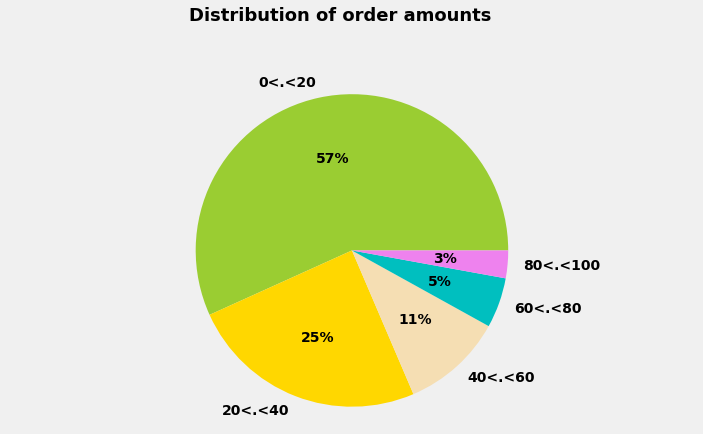

In [15]:
price_range = [0, 20, 40, 60, 80, 100]
count_price = []
for i,price in enumerate(price_range):
    if i==0:continue
    val = basket_price[(basket_price['Basket Price'] < price)&
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue', 'firebrick']
labels = ["{}<.<{}".format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels = labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle = 0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha = 'center', fontsize = 18)
plt.show()

In [0]:

is_noun = lambda pos:pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    import nltk
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots = dict()
    keywords_select = dict()
    category_keys = []
    count_keywords = dict()
    icount = 0
    
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
        
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)
            
            category_keys.append(clef)
            keywords_select[s] = clef
        
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
            
    print("Number of keywords in the variable '{}': {}".format(colonne, len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [0]:
df_produits = pd.DataFrame(data['Department Name'].unique()).rename(columns = {0:"Description"})

In [21]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [27]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

Number of keywords in the variable 'Description': 83


In [0]:
# Plotting keywords vs frequency graph :
list_products = []
for k, v in count_keywords.items():
    word = keywords_select[k]
    list_products.append([word, v])

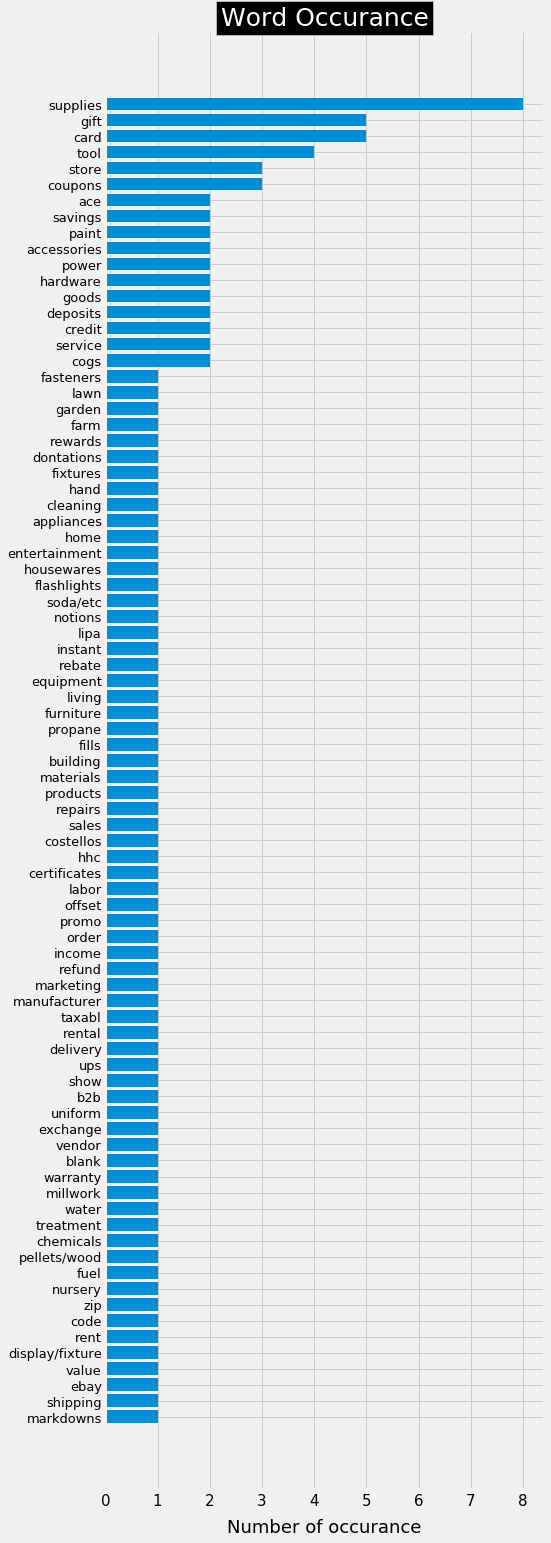

In [29]:
liste = sorted(list_products, key = lambda x:x[1], reverse=True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.yticks(x_axis, x_label)
plt.xlabel("Number of occurence", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align='center')
ax = plt.gca()
ax.invert_yaxis()

plt.title("Word Occurence", bbox={'facecolor':'k', 'pad':5}, color='w', fontsize = 25)
plt.show()

In [36]:
# Preserving important words :
list_products = []
for k, v in count_keywords.items():
    word = keywords_select[k]
    if word in ['taxabl', 'hhc', 'fills', 'lipa', 'ace']: continue
    if len(word)<2: continue
    list_products.append([word, v])
    
list_products.sort(key = lambda x:x[1], reverse=True)
print("Number of preserved words : ", len(list_products))

Number of preserved words :  78


In [0]:
threshold = [0, 1, 3, 5]

# Getting the description.
liste_produits = data['Department Name'].unique()

In [0]:
# Creating the product and word matrix.
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), liste_produits))

In [0]:
label_col = []
for i in range(len(threshold)):
    if i == len(threshold) - 1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i], threshold[i+1])
        
    label_col.append(col)
    X.loc[:, col] = 0

In [0]:
for i, prod in enumerate(list_products):
    prix = data[data['Department Name'].isin(prod)]['Cost'].mean()
    j = 0
    
    while prix > threshold[j]:
        j += 1
        if j == len(threshold):
            break
    X.loc[i, label_col[j-1]] = 1

In [296]:

print("{:<8} {:<20} \n".format('Range', 'Number of products') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

Range    Number of products   
--------------------
0<.<1       0                   
1<.<3       0                   
3<.<5       0                   
.>5         78                  


In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [44]:
matrix = X.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [46]:
# Using optimal number of clusters using hyperparameter tuning:
for n_clusters in range(3, 10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    sil_avg = silhouette_score(matrix, clusters)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  3 The average silhouette_score is :  0.20195677761398362
For n_clusters :  4 The average silhouette_score is :  0.211433677639493
For n_clusters :  5 The average silhouette_score is :  0.2323773593188208
For n_clusters :  6 The average silhouette_score is :  0.2344374207551469
For n_clusters :  7 The average silhouette_score is :  0.10247199790358058
For n_clusters :  8 The average silhouette_score is :  0.24909964639453328
For n_clusters :  9 The average silhouette_score is :  0.24054127625712976


In [48]:

# Choosing number of clusters as 6:
# Trying Improving the silhouette_score :
n_clusters = 6
sil_avg = -1
while sil_avg < 0.22:
    kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    sil_avg = silhouette_score(matrix, clusters)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  6 The average silhouette_score is :  0.2367382162386419


In [49]:

# Printing number of elements in each cluster :
pd.Series(clusters).value_counts()

1    61
2     8
3     5
5     3
4     3
0     1
dtype: int64

In [0]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    import matplotlib as mpl
    mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)
    
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhoutte_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhoutte_values.sort()
        size_cluster_i = ith_cluster_silhoutte_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhoutte_values, alpha = 0.8)
        
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                 bbox = dict(facecolor = 'white', edgecolor = 'black', boxstyle = 'round, pad = 0.3'))
        
        y_lower = y_upper + 10

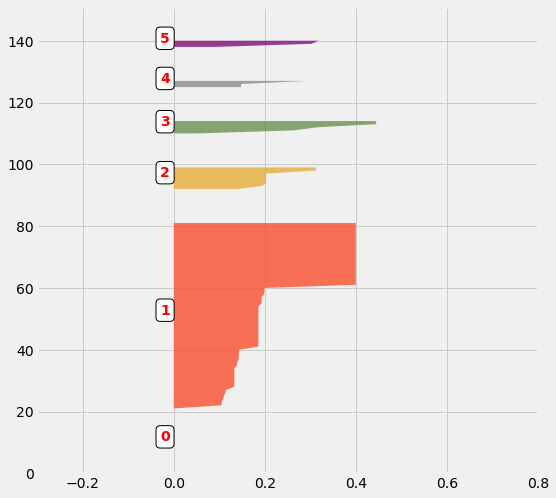

In [51]:
from sklearn.metrics import silhouette_samples
sample_silhouette_values = silhouette_samples(matrix, clusters)
graph_component_silhouette(n_clusters, [-0.3, 0.8], len(X), sample_silhouette_values, clusters)

In [0]:
liste = pd.DataFrame(liste_produits)
liste_words = [word for (word, occurance) in list_products]

occurance = [dict() for _ in range(n_clusters)]

In [0]:
# Printing word cloud.
from random import randint
import random
def random_color_func(word=None, font_size=None, position=None,orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [0]:
from wordcloud import WordCloud 

In [0]:
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4, 2, increment)
    words = dict()
    trunc_occurances = liste[0:150]
    for s in trunc_occurances:
        words[s[0]] = s[1]
        
    wc = WordCloud(width=1000,height=400, background_color='lightgrey', max_words=1628,relative_scaling=1,
                             color_func = random_color_func, normalize_plurals=False)
    wc.generate_from_frequencies(words)
    ax1.imshow(wc, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster n{}'.format(increment-1))

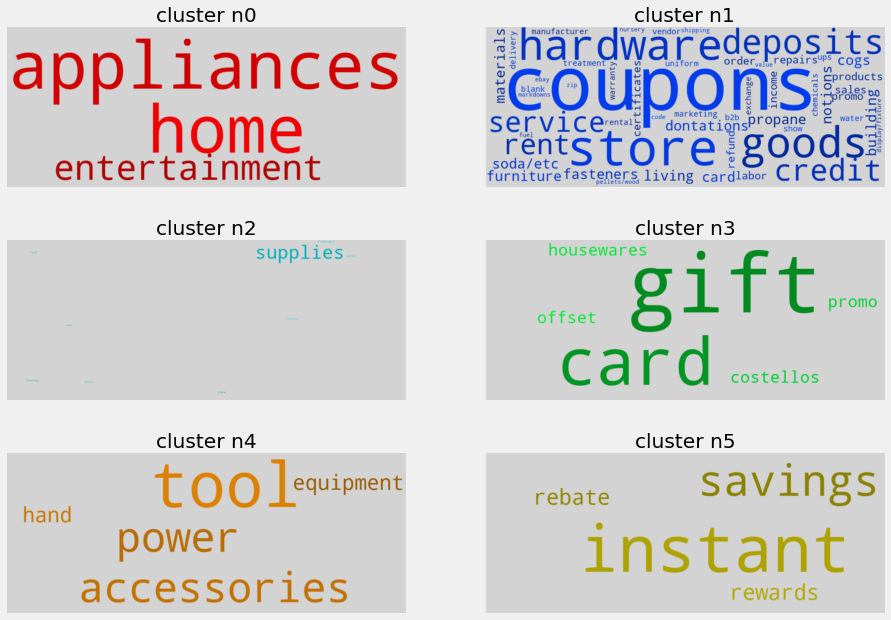

In [57]:

fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurance[i]
    tone = color[i]
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)

In [0]:
from sklearn.decomposition import PCA

In [0]:
#Dimensionality Reduction
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

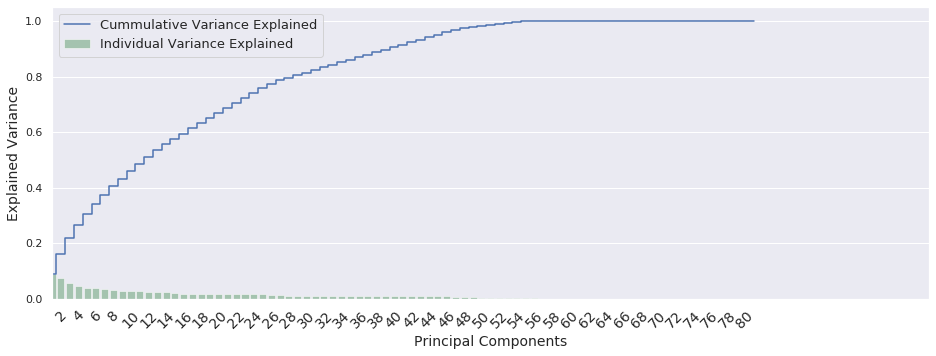

In [64]:
# Checking the amount of variance explained :
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[0]), pca.explained_variance_ratio_.cumsum(), where = 'mid', label = 'Cummulative Variance Explained')
sns.barplot(np.arange(1, matrix.shape[0] + 1), pca.explained_variance_ratio_, alpha = 0.5, color = 'g',
            label = 'Individual Variance Explained')
plt.xlim(0, 100)
plt.xticks(rotation = 45, fontsize = 14)
ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel("Explained Variance", fontsize = 14)
plt.xlabel("Principal Components", fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 13)
plt.show()

In [67]:
#Generating Customer Segments/Categories
corresp = dict()
for key, val in zip(liste_produits, clusters):
    corresp[key] = val
    
data['categ_product'] = data.loc[:, 'Department Name'].map(corresp)
data[['Receipt Number', 'Department Name', 'categ_product']][:10]

,Receipt Number,Department Name,categ_product
0,G13674,FASTENERS,1
1,D70801,"LAWN, GARDEN & FARM SUPPLIES",2
2,D70801,ACE REWARDS INSTANT SAVINGS,5
3,A39683,FASTENERS,1
4,A39683,DONTATIONS,1
5,2815,PAINT & PAINT SUPPLIES,2
6,2815,PLUMBING SUPPLIES & FIXTURES,2
7,2815,PLUMBING SUPPLIES & FIXTURES,2
8,E37837,HAND TOOLS & TOOL ACCESSORIES,4
9,D70802,CLEANING SUPPLIES,2


In [71]:
# Creating 5 new features that will contain the amount in a single transanction on different categories of product.
for i in range(5):
    col = 'categ_{}'.format(i)
    df_temp = data[data['categ_product'] == i]
    price_temp = df_temp['Cost'] * (df_temp['Net Sales Units'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    data.loc[:, col] = price_temp
    data[col].fillna(0, inplace = True)
    
data[['Receipt Number', 'Department Name', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']][:10]

,Receipt Number,Department Name,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
0,G13674,FASTENERS,1,0.0,0.02,0.00,0.0,0.00
1,D70801,"LAWN, GARDEN & FARM SUPPLIES",2,0.0,0.00,43.50,0.0,0.00
2,D70801,ACE REWARDS INSTANT SAVINGS,5,0.0,0.00,0.00,0.0,0.00
3,A39683,FASTENERS,1,0.0,1.89,0.00,0.0,0.00
4,A39683,DONTATIONS,1,0.0,0.16,0.00,0.0,0.00
5,2815,PAINT & PAINT SUPPLIES,2,0.0,0.00,1.42,0.0,0.00
6,2815,PLUMBING SUPPLIES & FIXTURES,2,0.0,0.00,12.69,0.0,0.00
7,2815,PLUMBING SUPPLIES & FIXTURES,2,0.0,0.00,27.55,0.0,0.00
8,E37837,HAND TOOLS & TOOL ACCESSORIES,4,0.0,0.00,0.00,0.0,9.26
9,D70802,CLEANING SUPPLIES,2,0.0,0.00,5.78,0.0,0.00


In [0]:
# percentage spent on each product category 
for i in range(5):
    col = "categ_{}".format(i)
    temp = data.groupby(by=['Customer Number', 'Receipt Number'], as_index = False)[col].sum()
    basket_price.loc[:, col] = temp


In [0]:
# Dates of the order.
data['Date_int'] = data['Date'].astype('int64')
temp = data.groupby(by=['Customer Number', 'Receipt Number'], as_index = False)['Date_int'].mean()
data.drop('Date_int', axis = 1, inplace=True)
basket_price.loc[:, 'Date'] = pd.to_datetime(temp['Date_int'])

In [81]:
# Selecting entries with basket price > 0.
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('Customer Number', ascending=True)[:5]

,Customer Number,Receipt Number,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,Date
0,*0,A02258,10.98,0.0,0.00,2.69,1.46,0.0,2017-07-28
30,*0,E25313,170.34,0.0,0.18,114.26,0.00,0.0,2018-12-22
31,*0,E26404,4.99,0.0,0.35,0.00,0.00,0.0,2017-02-02
32,*0,E35148,20.48,0.0,0.00,9.30,0.00,0.0,2018-11-23
33,*0,E62615,8.99,0.0,6.38,0.00,0.00,0.0,2017-06-16


In [283]:
#Time Based Splitting
import datetime
ord = basket_price[basket_price['Date'] < datetime.date(2017, 12, 31)]
test_ord = basket_price[basket_price['Date'] < datetime.date(2018, 12, 31)]
basket_price = ord.copy(deep = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
basket_price

,Customer Number,Receipt Number,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,Date
0,*0,A02258,10.98,0.0,0.00,2.69,1.46,0.00,2017-07-28
1,*0,A15601,13.01,0.0,15.06,0.00,0.00,0.00,2017-08-29
2,*0,A18344,2.69,0.0,0.25,0.00,0.00,0.00,2017-08-14
3,*0,A32613,47.97,0.0,145.71,0.00,0.00,0.00,2017-09-10
4,*0,A32665,9.48,0.0,3.42,0.00,0.00,0.00,2017-09-10
...,...,...,...,...,...,...,...,...,...
5693953,99999,57577,11.87,0.0,0.00,4.03,0.00,8.12,2017-05-25
5693954,99999,58270,4.81,0.0,0.00,0.00,4.65,0.00,2017-07-02
5693955,99999,58477,3.08,0.0,1.98,0.00,0.00,1.18,2017-07-14
5693956,99999,58479,2.78,0.0,0.00,2.86,0.00,0.00,2017-07-14


In [84]:
trans_per_user = basket_price.groupby(by=['Customer Number'])['Basket Price'].agg(['count', 'min', 'max', 'mean', 'sum'])

for i in range(5):
    col = 'categ_{}'.format(i)
    trans_per_user.loc[:, col] = basket_price.groupby(by=['Customer Number'])[col].sum() / trans_per_user['sum'] * 100
        
trans_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['Customer Number'])['categ_0'].sum()
trans_per_user.sort_values('Customer Number', ascending = True)[:5]

,Customer Number,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,*0,32,2.69,108.97,24.683750,789.88,0.0,55.205854,42.315288,1.378690,0.544386
1,*1,11,0.35,177.28,38.576364,424.34,0.0,17.179620,47.106094,16.067305,5.907998
2,*10,1,0.05,0.05,0.050000,0.05,0.0,40.000000,0.000000,0.000000,0.000000
3,*100,1,15.96,15.96,15.960000,15.96,0.0,27.944862,0.000000,0.000000,0.000000
4,*1000,3,13.98,24.48,19.483333,58.45,0.0,0.000000,66.022241,0.000000,0.000000


In [0]:
# Generating two new variables - days since first puchase and days since last purchase.
last_date = basket_price['Date'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['Customer Number'])['Date'].min())
last_purchase = pd.DataFrame(basket_price.groupby(by=['Customer Number'])['Date'].max())

test = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

trans_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['Date']
trans_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['Date']

We need to focus on customers who only placed one order, our objective is to target these customers in a way that retains them

In [88]:
n1 = trans_per_user[trans_per_user['count'] == 1].shape[0]
n2 = trans_per_user.shape[0]
print("No. of Customers with single purchase : {:<2}/{:<5} ({:<2.2f}%)".format(n1, n2, n1/n2*100))

No. of Customers with single purchase : 60476/284266 (21.27%)


In [273]:
import gc
gc.collect()

18839

In [0]:
del trans_per_user

In [92]:
#Building Customer Segments
list_cols = ['count', 'min', 'max', 'mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
selected_customers = trans_per_user.copy(deep=True)
matrix = selected_customers[list_cols].as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(matrix)
print("Variable Mean Values: \n" + 90*'-' + '\n', scaler.mean_)
scaled_matrix = scaler.transform(matrix)

Variable Mean Values: 
------------------------------------------------------------------------------------------
 [9.43290439e+00 1.25070366e+01 6.45501724e+01 2.79881274e+01
 4.84914456e-01 2.23384980e+12 4.79769575e+12 2.13087091e+12
 5.92891659e+00]


In [0]:
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(scaled_matrix)

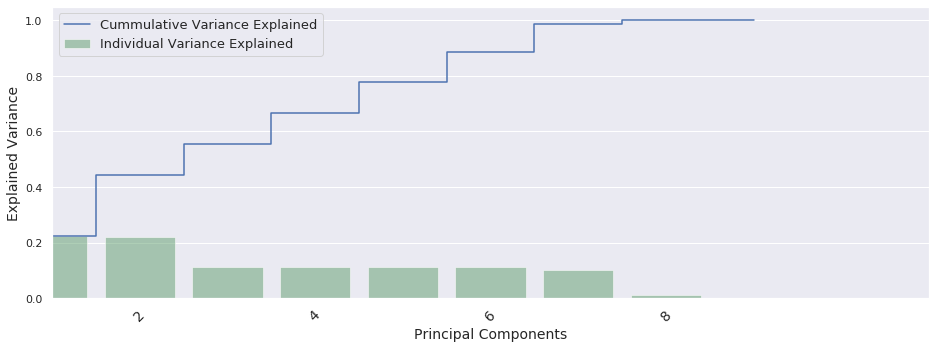

In [96]:
# Checking the amount of variance explained :
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where = 'mid', label = 'Cummulative Variance Explained')
sns.barplot(np.arange(1, matrix.shape[1] + 1), pca.explained_variance_ratio_, alpha = 0.5, color = 'g',
            label = 'Individual Variance Explained')
plt.xlim(0, 10)
plt.xticks(rotation = 45, fontsize = 14)
ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel("Explained Variance", fontsize = 14)
plt.xlabel("Principal Components", fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 13)
plt.show()

In [128]:
# Using optimal number of clusters using hyperparameter tuning:
for n_clusters in range(3, 21):
    km = MiniBatchKMeans(n_clusters=10, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000)
    km.fit(scaled_matrix)
    clusters = km.predict(scaled_matrix)
    sil_avg = silhouette_score(scaled_matrix, clusters, sample_size=1000)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  3 The average silhouette_score is :  0.2967543527434046
For n_clusters :  4 The average silhouette_score is :  0.5003717367482655
For n_clusters :  5 The average silhouette_score is :  0.44970930966750416
For n_clusters :  6 The average silhouette_score is :  0.33073367640002205
For n_clusters :  7 The average silhouette_score is :  0.492708038238751
For n_clusters :  8 The average silhouette_score is :  0.1871473730451239
For n_clusters :  9 The average silhouette_score is :  0.3813252139888716
For n_clusters :  10 The average silhouette_score is :  0.40446153946289964
For n_clusters :  11 The average silhouette_score is :  0.2261795110837096
For n_clusters :  12 The average silhouette_score is :  0.3234338786867253
For n_clusters :  13 The average silhouette_score is :  0.15327903404571736
For n_clusters :  14 The average silhouette_score is :  0.24689897421563883
For n_clusters :  15 The average silhouette_score is :  0.28969038160882987
For n_clusters :  16 The av

In [129]:
# Choosing number of clusters as 8:
# Trying Improving the silhouette_score :
n_clusters = 8
sil_avg = -1
while sil_avg < 0.18:
    km = MiniBatchKMeans(n_clusters=10, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000)
    km.fit(scaled_matrix)
    clusters = km.predict(scaled_matrix)
    sil_avg = silhouette_score(scaled_matrix, clusters, sample_size=1000)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  8 The average silhouette_score is :  0.43609226805833545


In [130]:
n_clusters = 8
km = MiniBatchKMeans(n_clusters=10, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000)
km.fit(scaled_matrix)
clusters_clients = km.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients, sample_size=1000)
print("Silhouette Score : {:<.3f}".format(silhouette_avg))

Silhouette Score : 0.266


In [131]:
# Looking at clusters :
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns=['Number of Customers']).T

,0,6,9,4,3,2,1,7,8,5
Number of Customers,129773,43457,36901,16233,16197,16157,12774,4621,4129,4024


In [0]:

selected_customers.loc[:, 'cluster'] = clusters_clients

In [154]:
selected_customers

,Customer Number,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,cluster
0,*0,32,2.69,108.97,24.683750,789.88,0.0,55.205854,42.315288,1.378690,0.544386,26,344,6
1,*1,11,0.35,177.28,38.576364,424.34,0.0,17.179620,47.106094,16.067305,5.907998,18,350,1
2,*10,1,0.05,0.05,0.050000,0.05,0.0,40.000000,0.000000,0.000000,0.000000,1,1,0
3,*100,1,15.96,15.96,15.960000,15.96,0.0,27.944862,0.000000,0.000000,0.000000,119,119,9
4,*1000,3,13.98,24.48,19.483333,58.45,0.0,0.000000,66.022241,0.000000,0.000000,134,221,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284261,999966,8,3.05,55.52,23.600000,188.80,0.0,39.782839,14.592161,68.877119,10.508475,58,327,0
284262,99997,21,14.11,431.53,175.204286,3679.29,0.0,0.000000,326.918237,0.000000,0.000000,23,361,7
284263,999977,2,10.90,10.90,10.900000,21.80,0.0,0.000000,300.000000,0.000000,0.000000,156,156,9
284264,99998,89,3.35,244.95,16.825056,1497.43,0.0,0.000000,228.524205,0.000000,0.000000,0,362,1


In [0]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])

In [157]:
merged_df

,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,size
cluster,,,,,,,,,,,,,
0.0,7.714216,4.117253,30.179038,13.228097,117.395920,0.004760,4.893218e+12,1.050929e+13,4.667644e+12,4.430909,79.619451,265.416127,129773
1.0,22.464381,3.712991,211.317378,41.766304,868.833769,0.267591,5.218696e+01,1.047813e+03,1.832988e+02,5.605012,29.855018,318.584703,12774
2.0,1.825710,45.558177,64.313341,53.984717,102.392387,0.033886,4.283384e+01,6.233037e+01,6.498094e+00,5.719141,141.987374,193.030080,16157
3.0,6.648886,11.206985,114.085512,52.222630,348.048808,0.080715,4.740852e+01,7.191334e+01,7.466304e+02,4.442520,71.768784,266.704019,16197
4.0,1.710343,26.162042,33.294162,29.414526,52.427958,0.002169,4.477270e+01,5.028461e+01,6.544924e+00,4.784127,144.535945,192.437812,16233
5.0,8.663270,11.206131,67.878285,29.775246,229.647716,28.994228,2.181171e+01,3.654238e+01,7.102237e+00,3.149064,67.899105,273.638917,4024
6.0,11.863451,5.625947,81.113469,29.686854,338.921802,0.117709,4.417394e+01,6.217176e+02,6.179024e+00,12.831564,49.734220,295.351911,43457
7.0,123.491885,12.199866,568.146568,120.691767,6736.933402,0.203278,8.664612e+01,1.266315e+02,1.575539e+01,11.008149,63.952391,277.037221,4621


In [158]:
    
print('Number of customers : ', merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')

Number of customers :  243236


In [0]:
# Reorganizing the content of the dataframe.
liste_index = []
for i in range(4):
    column = 'categ_{}'.format(i)
    liste_index.append(merged_df[merged_df[column] > 20].index.values[0])

In [177]:
liste_index_reordered = liste_index
liste_index_reordered += [s for s in merged_df.index if s not in liste_index]

merged_df = merged_df.reindex(index = liste_index_reordered)
merged_df = merged_df.reset_index(drop = False)
merged_df.head()

,cluster,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,size
0,5.0,8.663270,11.206131,67.878285,29.775246,229.647716,28.994228,2.181171e+01,3.654238e+01,7.102237e+00,3.149064,67.899105,273.638917,4024
1,4.0,1.710343,26.162042,33.294162,29.414526,52.427958,0.002169,4.477270e+01,5.028461e+01,6.544924e+00,4.784127,144.535945,192.437812,16233
2,4.0,1.710343,26.162042,33.294162,29.414526,52.427958,0.002169,4.477270e+01,5.028461e+01,6.544924e+00,4.784127,144.535945,192.437812,16233
3,0.0,7.714216,4.117253,30.179038,13.228097,117.395920,0.004760,4.893218e+12,1.050929e+13,4.667644e+12,4.430909,79.619451,265.416127,129773
4,2.0,1.825710,45.558177,64.313341,53.984717,102.392387,0.033886,4.283384e+01,6.233037e+01,6.498094e+00,5.719141,141.987374,193.030080,16157


In [ ]:
#Classifying the customers

In [0]:
selected_customers.to_csv("/content/drive/My Drive/selected_customers.csv")

In [0]:
merged_df.to_csv("/content/drive/My Drive/merged_df.csv")

In [182]:
selected_customers = pd.read_csv('/content/drive/My Drive/selected_customers.csv')
merged_df = pd.read_csv('/content/drive/My Drive/merged_df.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
X = selected_customers[columns]
Y = selected_customers['cluster']

In [0]:
del data

In [0]:
#Train-test splitting
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

In [0]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [0]:
#Training models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [0]:
rf = RandomForestClassifier(max_depth=2, random_state=0, max_features = 'sqrt')

In [239]:
rf.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
pred = rf.predict(X_test)

In [241]:
from sklearn.metrics import accuracy_score
print("Precision: {:.2f} %".format(100 * accuracy_score(Y_test, pred)))

Precision: 51.85 %


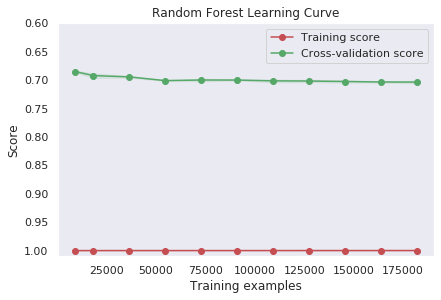

In [243]:
g = plot_learning_curve(rf.base_estimator_, "Random Forest Learning Curve", X_train, Y_train, ylim=[1.01, 0.6], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [0]:
tr = DecisionTreeClassifier(max_features='log2', random_state=0)

In [254]:
tr.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
pred = tr.predict(X_test)

In [256]:
print("Precision: {:.2f} %".format(100 * accuracy_score(Y_test, pred)))

Precision: 70.62 %


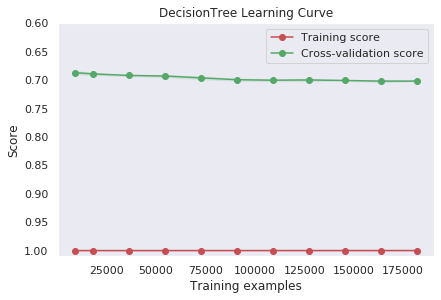

In [257]:
g = plot_learning_curve(tr, "DecisionTree Learning Curve", X_train, Y_train, ylim=[1.01, 0.6], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [0]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [261]:
neigh.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
pred = neigh.predict(X_test)

In [265]:
print("Precision: {:.2f} %".format(100 * accuracy_score(Y_test, pred)))

Precision: 69.51 %


KeyboardInterrupt: ignored

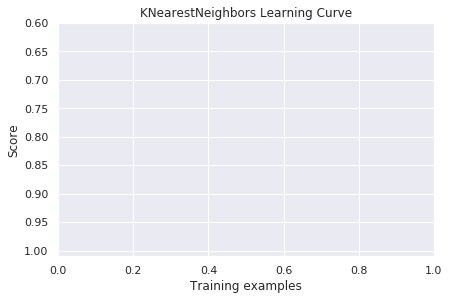

In [267]:
g = plot_learning_curve(neigh, "KNearestNeighbors Learning Curve", X_train, Y_train, ylim=[1.01, 0.6], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [0]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[('rf', rf.base_estimator_), ('knn', neigh), ('tr', tr)])

In [0]:
votingC = votingC.fit(X_train, Y_train)

In [0]:
predictions = votingC.predict(X_test)

In [271]:
print("Precision : {:.2f}%".format(100 * accuracy_score(Y_test, predictions)))

Precision : 73.13%
